In [25]:
%load_ext autoreload
%autoreload 2

import copy
import os
#os.chdir("..")
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from utils.script_utils import obtain_data, obtain_data_cval
from utils.train_script import use_ml_models, use_dl

from derma.sol.stratification.utils.utils import (
                    stratify_survival_prediction, plot_mean_survival_curves, 
                    plot_calibration_curve, plot_calibration_curve, plot_calibration_curve_km,
                    plot_time_auc, plot_survival_roc_curve)
from derma.sol.stratification.utils.calibration import survival_probability_calibration

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
_,_,data, labels = obtain_data_cval(dl=False)
_,_, data_dl, labels_dl = obtain_data_cval(dl=True)

### Train models

In [8]:
### Create hyperparams
class ArgsDict:
    def __init__(self, params_dict):
        self.params_dict = params_dict
        
    def __getattr__(self, name):
        if name in self.params_dict:
            return self.params_dict[name]
        else:
            raise AttributeError(f"'ArgsDict' object has no attribute '{name}'")
            
args_dict = {
    "dropout_prob": 0.1, "lr": 0.0001, "reg": 0.001,    "num_durations": 30,
    "num_layers": 1,    "num_nodes": 16,
    "batch_norm": True,    "output_bias": True,
    "aft_loss_distribution": "normal",    "aft_loss_distribution_scale": 1.0,
    "min_child_weight": 1,    "num_boost_round": 100,
    "gamma": 0.001,    "alpha": 0.0001,
    "n_estimators": 400,    "max_depth": 11,
    "min_samples_split": 25,    "max_features": "auto",
    "model": "deepsurv"
}

args = ArgsDict(args_dict)




In [21]:
#deep_copy_data = copy.deepcopy(data)
train_times = [x[1] for x in labels[0]]
train_events = [x[0] for x in labels[0]]

test_times = [x[1] for x in labels[1]]
test_events = [x[0] for x in labels[1]]


train_df = pd.DataFrame({'event': train_events, 'duration': train_times})
test_df = pd.DataFrame({'event': test_events, 'duration': test_times})



In [7]:
# Train deepsurv model
rsf_cindex, rsf_brier, rsf_model = use_ml_models(data, labels, args)

In [9]:
# Train the DeepSurv model
ds_cindex, ds_brier,log, ds_model = use_dl(data_dl, labels_dl, args)

Could not log loss


/home/carlos.hernandez/PhD/marato-derma/derma/sol/stratification/utils/calibration.py:52: RuntimeWarning: divide by zero encountered in log
  return np.log(-np.log(1 - p))
/home/carlos.hernandez/dl/lib/python3.8/site-packages/lifelines/fitters/mixins.py:19: RuntimeWarning: invalid value encountered in subtract
  return self.relu(x - knot) ** 3 - (lambda_ * self.relu(x - min_knot) ** 3 + (1 - lambda_) * self.relu(x - max_knot) ** 3)
/home/carlos.hernandez/PhD/marato-derma/derma/sol/stratification/utils/calibration.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/carlos.hernandez/PhD/marato-derma/derma/sol/stratification/utils/calibration.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


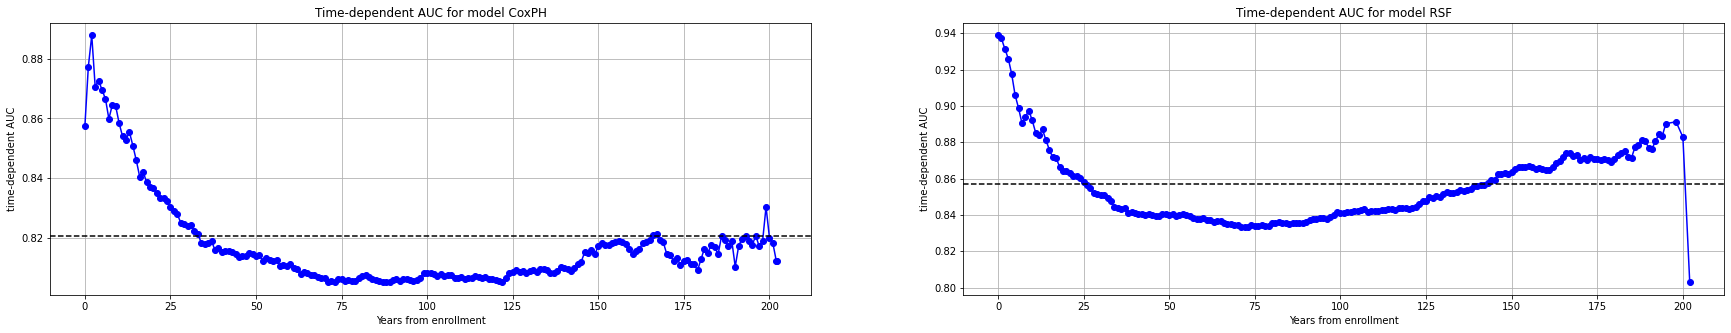

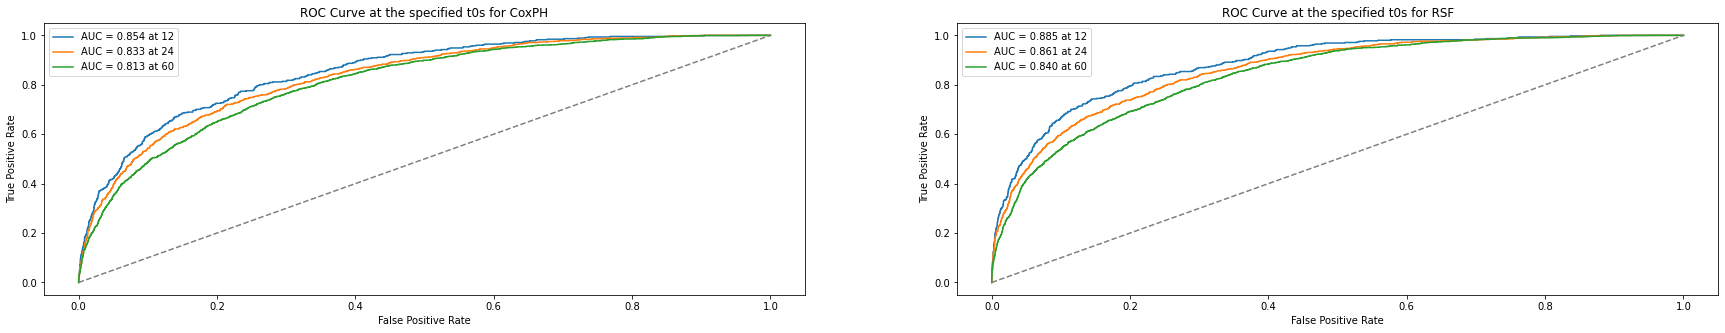

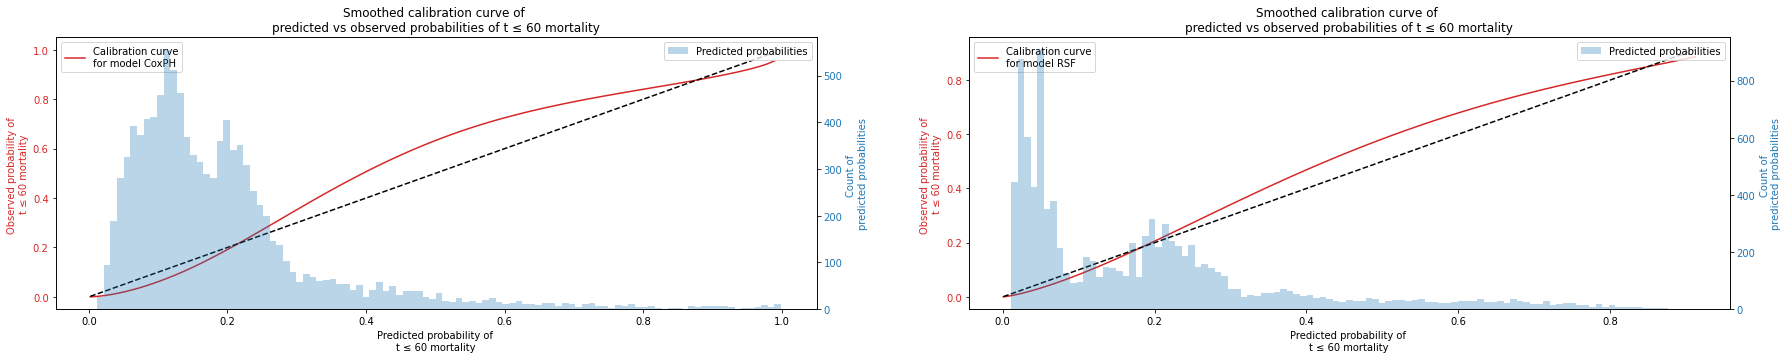

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 5), gridspec_kw={'hspace': 0.5})
fig_2, axs_2 = plt.subplots(nrows=1, ncols=2, figsize=(30, 5), gridspec_kw={'hspace': 0.5})
fig_3, axs_3 = plt.subplots(nrows=1, ncols=2, figsize=(30, 5), gridspec_kw={'hspace': 0.5, 'wspace': 0.2})

X_train = deep_copy_data[0]
X_test = deep_copy_data[1]


for i, model in enumerate([ds_model, rsf_model]):
    ax = axs[i]
    ax_2 = axs_2[i]
    ax_3 = axs_3[i]
    plot_time_auc(model, X_test, train_df, test_df, ax=ax)
    plot_survival_roc_curve(model, X_test, test_df, times_plot = [12,12*2,12*5], ax=ax_2)
    #plot_calibration_curve(model, X_test, test_df, [5], ax=ax_3)
    _ = survival_probability_calibration(model, X_test, test_df, 60, ax=ax_3)

In [35]:
durations_array = train_df.duration.unique()
durations_array.sort()
durations_array

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15